In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [8]:
df = pd.read_pickle('all_trips.pkl')

c:\Users\Leona\anaconda3\envs\test\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


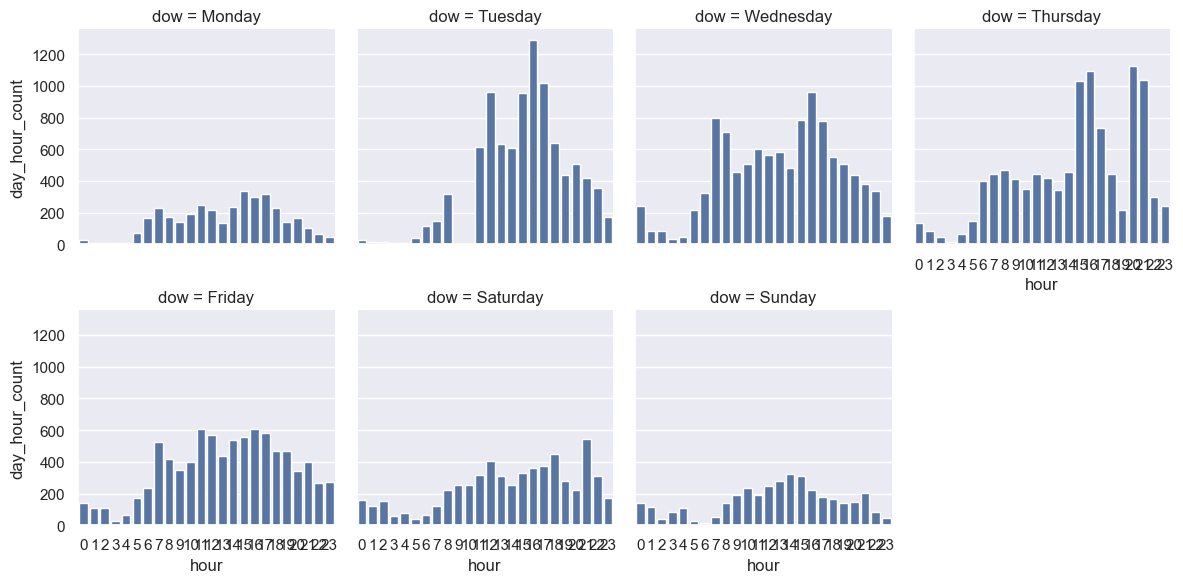

In [9]:
df['dow'] = df.trip_start_time.dt.day_name()
df['hour'] = df.trip_start_time.dt.hour
ax  = sns.FacetGrid(data=df.groupby([
    'dow',
    'hour'
]).hour.count().to_frame(name='day_hour_count').reset_index(), col='dow', col_order=[
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap=4)
ax.map(sns.barplot, 'hour', 'day_hour_count');

In [13]:
daily = df.set_index('trip_start_time').groupby(pd.Grouper(freq='D')).size()
daily = pd.DataFrame(daily)
daily = daily.reset_index()
daily.columns = ['ds', 'y']
daily

,ds,y
0,2024-02-20,8327
1,2024-02-21,10649
2,2024-02-22,10464
3,2024-02-23,8678
4,2024-02-24,5849
5,2024-02-25,3679
6,2024-02-26,3582
7,2024-02-27,991
8,2024-02-28,0
9,2024-02-29,3


In [14]:
m = Prophet()
m.fit(daily)

11:59:15 - cmdstanpy - INFO - Chain [1] start processing
11:59:15 - cmdstanpy - INFO - Chain [1] done processing


In [17]:

future = m.make_future_dataframe(periods=5)
future

,ds
0,2024-02-20
1,2024-02-21
2,2024-02-22
3,2024-02-23
4,2024-02-24
5,2024-02-25
6,2024-02-26
7,2024-02-27
8,2024-02-28
9,2024-02-29


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

c:\Users\Leona\anaconda3\envs\test\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Leona\anaconda3\envs\test\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


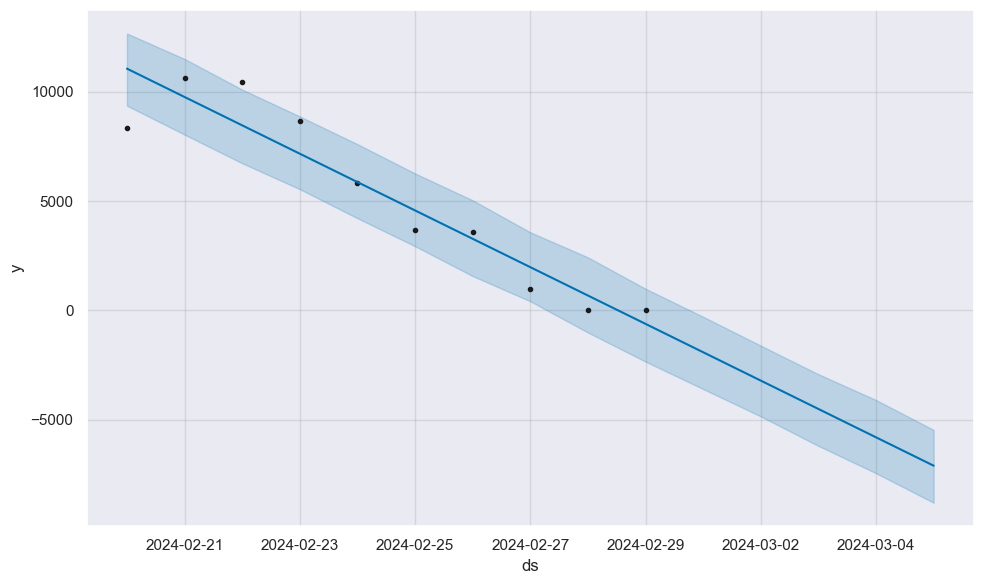

In [19]:
fig1 = m.plot(forecast)

In [20]:
hourly = df.set_index('trip_start_time').groupby(pd.Grouper(freq='2h')).size()
hourly = pd.DataFrame(hourly)
hourly = hourly.reset_index()
hourly.columns = ['ds', 'y']
hourly.head()

,ds,y
0,2024-02-20 10:00:00,614
1,2024-02-20 12:00:00,1304
2,2024-02-20 14:00:00,1563
3,2024-02-20 16:00:00,2313
4,2024-02-20 18:00:00,1076


In [21]:
mh = Prophet()
mh.fit(hourly)

12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
futureh = mh.make_future_dataframe(periods=120)
futureh

,ds
0,2024-02-20 10:00:00
1,2024-02-20 12:00:00
2,2024-02-20 14:00:00
3,2024-02-20 16:00:00
4,2024-02-20 18:00:00
...,...
224,2024-06-24 10:00:00
225,2024-06-25 10:00:00
226,2024-06-26 10:00:00
227,2024-06-27 10:00:00


In [24]:
forecasth = mh.predict(future)
forecasth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2024-02-20,757.624405,410.519167,1077.761696
1,2024-02-21,632.034930,301.828407,958.415468
2,2024-02-22,506.445450,170.204023,826.490812
3,2024-02-23,380.855970,32.845201,707.600599
4,2024-02-24,255.265685,-81.895533,608.218561
5,2024-02-25,129.671407,-203.229668,465.402615
6,2024-02-26,4.077131,-346.525491,324.225726
7,2024-02-27,-121.517142,-480.480001,198.759400
8,2024-02-28,-247.111417,-575.625665,85.993386
9,2024-02-29,-372.705693,-688.614991,-51.170739


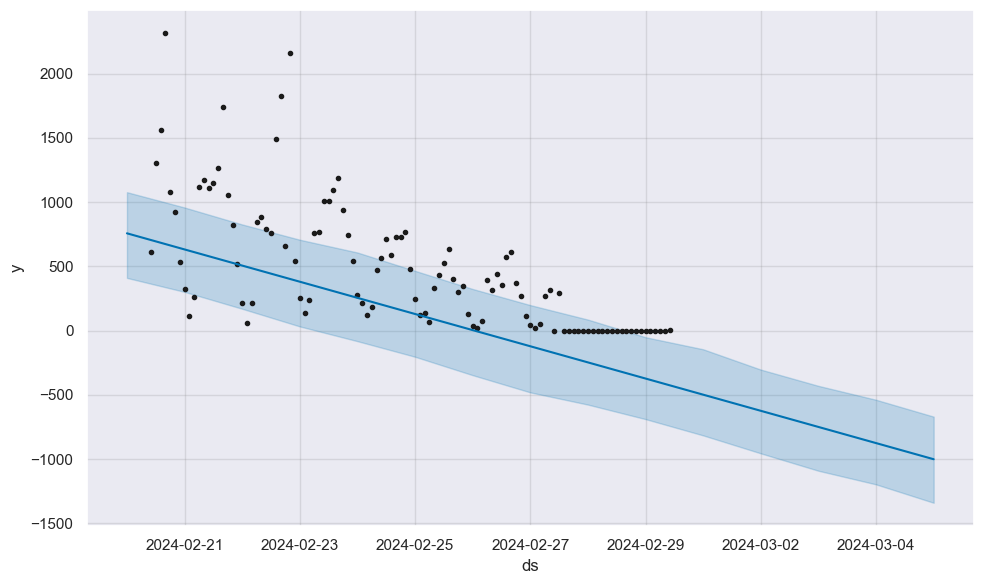

In [26]:
figh = mh.plot(forecasth)

In [27]:
forecast.to_csv('forecast.csv')
forecasth.to_csv('forecasth.csv')
forecast.to_pickle('forecast.pkl')
forecasth.to_pickle('forecasth.pkl')